In [3]:
import pandas as pd

df = pd.read_csv("candidates.csv", sep=";")

print(df.head()) 
print(df.info())  
print(df.describe())  

df_cleaned = df.dropna()

df_cleaned["code_challenge_score"] = pd.to_numeric(df_cleaned["code_challenge_score"], errors="coerce")
df_cleaned["technical_interview_score"] = pd.to_numeric(df_cleaned["technical_interview_score"], errors="coerce")

df_cleaned["application_date"] = pd.to_datetime(df_cleaned["application_date"], errors="coerce")

df_hired = df_cleaned[(df_cleaned["code_challenge_score"] >= 7) & (df_cleaned["technical_interview_score"] >= 7)]

df_hired.to_csv("candidates_cleaned.csv", index=False)

print("dataset limpio guardad")


    firstname    lastname                      email application_date  \
0  Bernadette   Langworth        leonard91@yahoo.com       26/02/2021   
1      Camryn    Reynolds        zelda56@hotmail.com       09/09/2021   
2       Larue      Spinka   okey_schultz41@gmail.com       14/04/2020   
3        Arch      Spinka     elvera_kulas@yahoo.com       01/10/2020   
4       Larue  Altenwerth  minnie.gislason@gmail.com       20/05/2020   

   country  yoe  seniority                         technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   code_challenge_score  technical_interview_score  
0                     3                          3  
1                     2                         10  
2          

C:\Users\sagru\AppData\Local\Temp\ipykernel_17604\3822350593.py:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned["application_date"] = pd.to_datetime(df_cleaned["application_date"], errors="coerce")


In [4]:
import mysql.connector
import pandas as pd

conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",  
    database="candidates_db"
)
cursor = conexion.cursor()
df = pd.read_csv("candidates_cleaned.csv")
for _, row in df.iterrows():
    sql = """
    INSERT INTO candidates (first_name, last_name, email, country, application_date, 
                            yoe, seniority, technology, code_challenge_score, technical_interview)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    values = (
        row["firstname"], row["lastname"], row["email"], row["country"], row["application_date"],
        row["yoe"], row["seniority"], row["technology"], row["code_challenge_score"], row["technical_interview_score"]
    )
    cursor.execute(sql, values)

conexion.commit()
cursor.close()
conexion.close()

print("datos insertados")


datos insertados


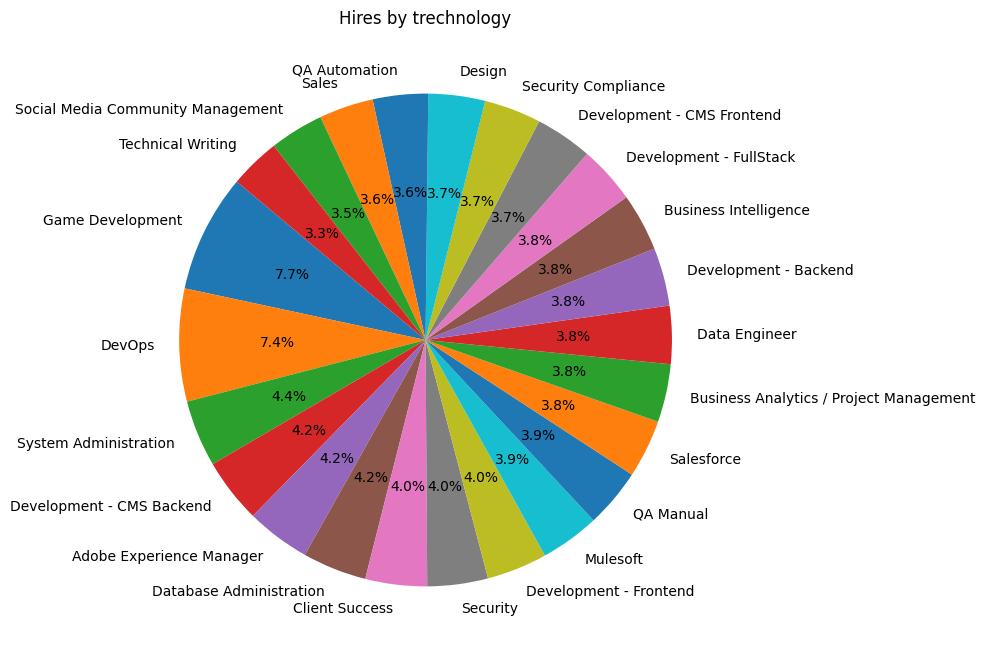

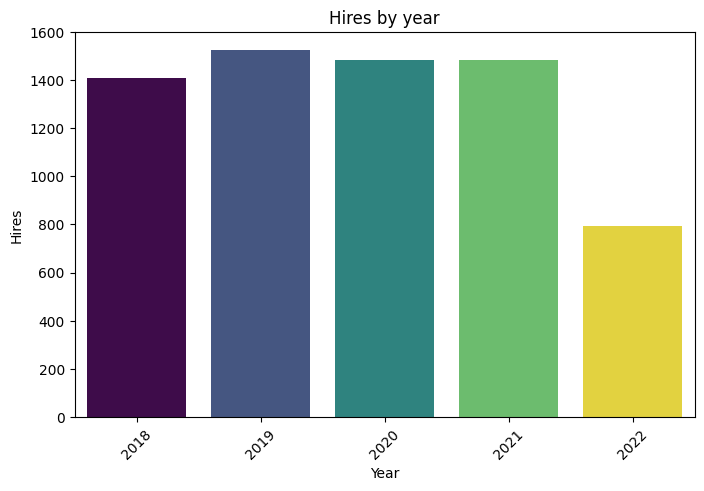

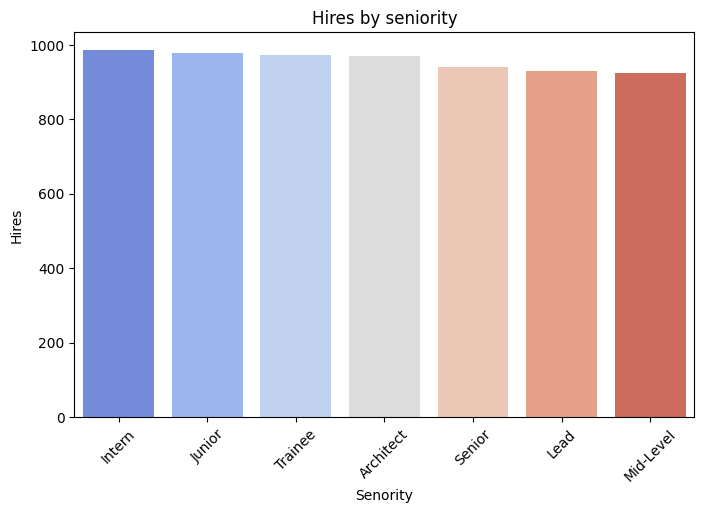

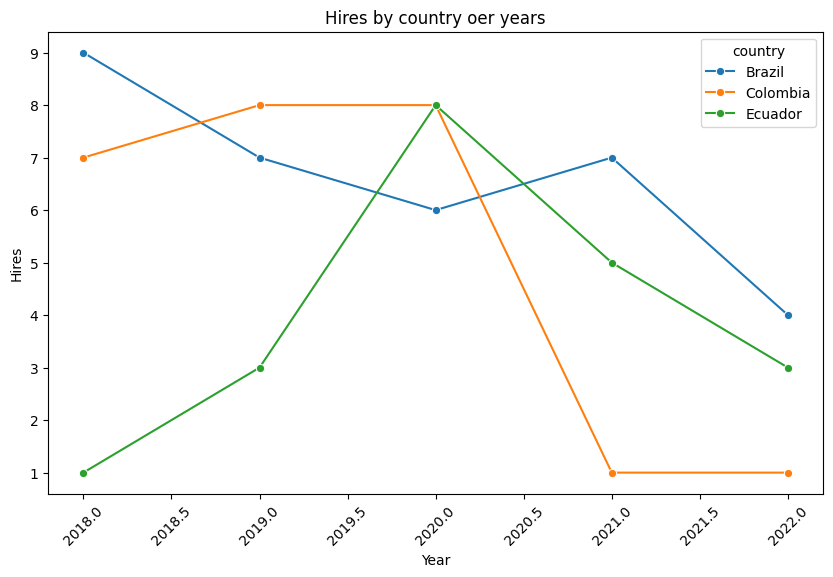

graficas hechas


In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="candidates_db"
)
cursor = conexion.cursor()
cursor.execute("SELECT technology, COUNT(*) FROM candidates GROUP BY technology ORDER BY COUNT(*) DESC;")
tech_data = cursor.fetchall()
df_tech = pd.DataFrame(tech_data, columns=["Technology", "Hires"])

cursor.execute("SELECT YEAR(application_date), COUNT(*) FROM candidates GROUP BY YEAR(application_date) ORDER BY YEAR(application_date);")
year_data = cursor.fetchall()
df_year = pd.DataFrame(year_data, columns=["Year", "Hires"])

cursor.execute("SELECT seniority, COUNT(*) FROM candidates GROUP BY seniority ORDER BY COUNT(*) DESC;")
seniority_data = cursor.fetchall()
df_seniority = pd.DataFrame(seniority_data, columns=["Seniority", "Hires"])

cursor.execute("SELECT country, YEAR(application_date), COUNT(*) FROM candidates WHERE country IN ('USA', 'Brazil', 'Colombia', 'Ecuador') GROUP BY country, YEAR(application_date) ORDER BY YEAR(application_date), country;")
country_data = cursor.fetchall()
df_country = pd.DataFrame(country_data, columns=["Country", "Year", "Hires"])

cursor.close()
conexion.close()

plt.figure(figsize=(8, 8))
plt.pie(df_tech["Hires"], labels=df_tech["Technology"], autopct="%1.1f%%", startangle=140)
plt.title("Hires by trechnology")
plt.show()

#by year
plt.figure(figsize=(8, 5))
sns.barplot(x=df_year["Year"], y=df_year["Hires"], hue=df_year["Year"], palette="viridis", dodge=False, legend=False)
plt.xlabel("Year")
plt.ylabel("Hires")
plt.title("Hires by year")
plt.xticks(rotation=45)
plt.show()

#by seniority
plt.figure(figsize=(9, 5))
sns.barplot(x=df_seniority["Seniority"], 
            y=df_seniority["Hires"], 
            hue=df_seniority["Seniority"], 
            palette="coolwarm", 
            dodge=False, 
            legend=False)
plt.xlabel("Senority")
plt.ylabel("Hires")
plt.title("Hires by seniority")
plt.xticks(rotation=45)
plt.show()

#multiline by country over years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_country, x="Year", y="Hires", hue="Country", marker="o")
plt.xlabel("Year")
plt.ylabel("Hires")
plt.title("Hires by country oer years")
plt.xticks(rotation=45)
plt.legend(title="country")
plt.show()

print("graficas hechas")
